In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_mldata
%matplotlib inline
from sklearn.utils import shuffle

# #use all digits

SPLIT = 40000
END = 48000

mnist = fetch_mldata("MNIST original")
x_dat, y_dat = mnist.data[:END] / 255., mnist.target[:END]



x_dat, y_dat = shuffle(x_dat, y_dat)
x_train, y_train = x_dat[:SPLIT], y_dat[:SPLIT]  # lets subsample a bit for a first impression
x_test, y_test = x_dat[SPLIT:END],y_dat[SPLIT:END]
# pca = PCA(svd_solver='randomized',n_components=2)
# fig, plot = plt.subplots()
# fig.set_size_inches(50, 50)
# plt.prism()

# X_transformed = pca.fit_transform(x_train)
# plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train)
# plot.set_xticks(())
# plot.set_yticks(())

# plt.tight_layout()

In [2]:
# PCA Reconstruction

def reconstruct(model,train_set):
    train_pca = (train_set - model.mean_).dot(model.components_.T)
    return train_pca.dot(model.components_) + model.mean_


pca = PCA(n_components=20)
pca.fit(x_train)

x_train_pca = pca.transform(x_train)
x_train_pca2 = (x_train - pca.mean_).dot(pca.components_.T)

x_projected = pca.inverse_transform(x_train_pca)
x_projected2 = x_train_pca.dot(pca.components_) + pca.mean_

x_test_pca = pca.transform(x_test)

x_test_projected = x_test_pca.dot(pca.components_) + pca.mean_

loss = ((x_train - x_projected) ** 2).mean()
loss2 = ((x_train - x_projected2) ** 2).mean()

print(loss,loss2)



0.0233099894015 0.0233099894015


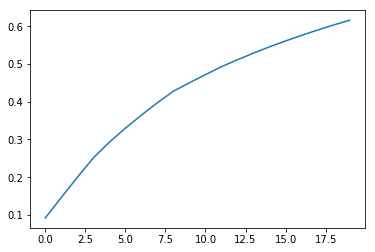

In [55]:
plt.plot(np.arange(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))

In [3]:
def showDigitImage(array):
    t = (array).reshape(28,28)
    plt.imshow(t)
    plt.show()

# Pure Data

In [47]:
# Train from original data

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(x_train, y_train)
right = np.sum(logisticRegr.predict(x_test)==y_test)
print(right,"/",len(y_test),"=",right/len(y_test),"%")

7576 / 8000 = 0.947 %


In [56]:
x_train.shape

(40000, 784)

In [5]:
# Train from PCA

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(x_train_pca, y_train)
right = np.sum(logisticRegr.predict(pca.transform(x_test))==y_test)
print(right,"/",len(y_test),"=",right/len(y_test),"%")


7218 / 8000 = 0.90225 %


[ 5.  7.  2.  5.  6.] [ 7.  0.  1.  1.  5.]


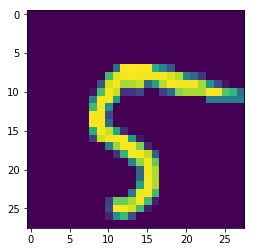

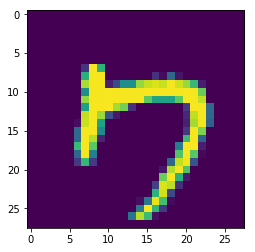

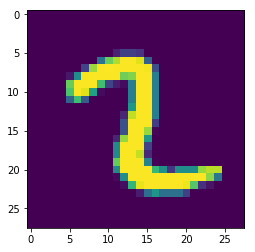

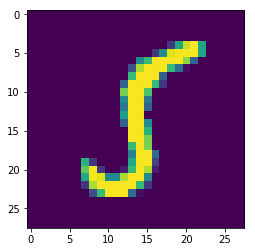

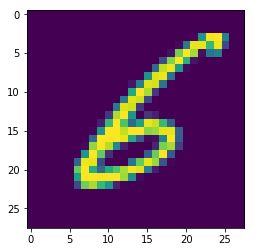

In [6]:
ans = logisticRegr.predict(pca.transform(x_test))
rs = ans!=y_test
print(y_test[rs][:5],ans[rs][:5])
for mistake in x_test[rs][:5]:
    showDigitImage(mistake)

In [7]:
# Train from PCA_inverse

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(x_projected, y_train)
right = np.sum(logisticRegr.predict(x_test_projected)==y_test)
print(right,"/",len(y_test),"=",right/len(y_test),"%")

7218 / 8000 = 0.90225 %


[ 5.  7.  2.  5.  6.] [ 7.  0.  1.  1.  5.]


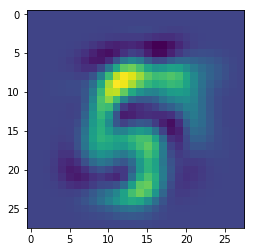

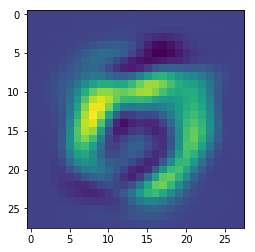

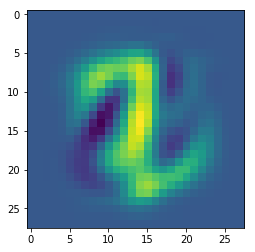

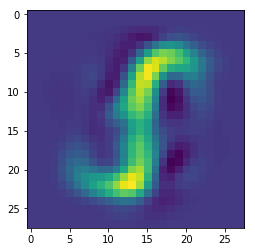

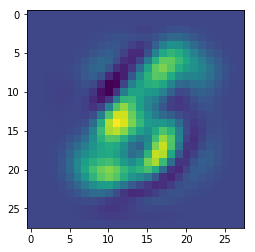

In [8]:
ans = logisticRegr.predict(x_test_projected)
rs = ans!=y_test
print(y_test[rs][:5],ans[rs][:5])
for mistake in x_test_projected[rs][:5]:
    showDigitImage(mistake)

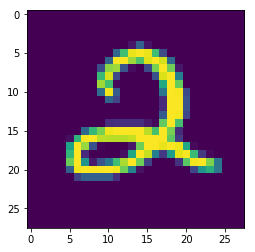

In [9]:
showDigitImage(x_train[0])

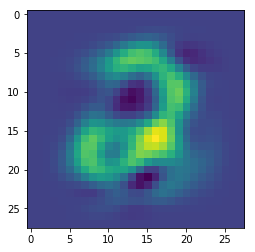

In [10]:
showDigitImage(x_projected[0])

In [57]:
def add_noise_to_array(pure):
    pure = pure.copy()
    noise = np.random.normal(0, 0.3, pure.shape)
    signal = pure + noise
    return signal

def add_noise_to_train_set(x_train):
    rs = []
    for i in x_train:
        rs += [add_noise_to_array(i)]
    return rs


In [58]:
x_train_noisy = add_noise_to_train_set(x_train)
# showDigitImage(x_train_noisy[100])
# showDigitImage(x_train[100])
# showDigitImage(x_projected[100])

In [59]:
pca = PCA(n_components=20)
pca.fit(x_train_noisy)

x_train_pca_noisy = pca.transform(x_train_noisy)

x_projected_noisy = x_train_pca_noisy.dot(pca.components_) + pca.mean_

ppca = PCA(n_components=30)
ppca.fit(x_projected_noisy)

loss = ((x_train_noisy - x_projected_noisy) ** 2).mean()

x_test_noisy = np.array(add_noise_to_train_set(x_test))

x_test_pca_noisy = pca.transform(x_test_noisy)

x_test_projected_noisy = x_test_pca_noisy.dot(pca.components_) + pca.mean_


In [60]:
# print(x_test_noisy[0][:])
# print(x_test[0][:])

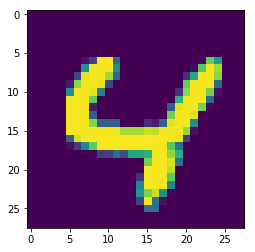

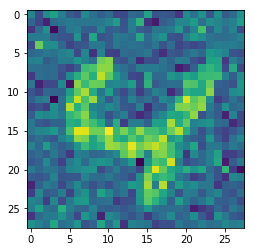

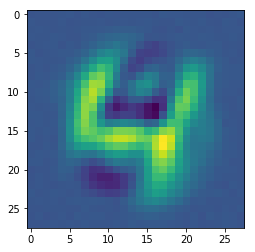

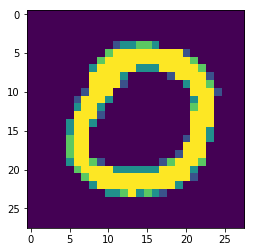

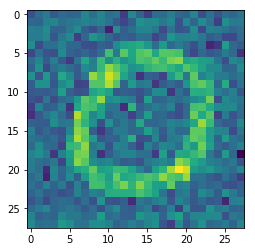

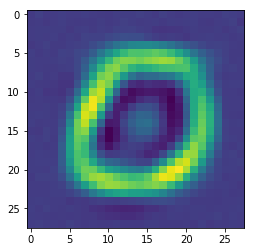

In [61]:
showDigitImage(x_train[200])
showDigitImage(x_train_noisy[200])
showDigitImage(x_projected_noisy[200])

showDigitImage(x_test[4])
showDigitImage(x_test_noisy[4])
showDigitImage(x_test_projected_noisy[4])


# White noise

In [62]:
# Train from original noisy

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(x_train_noisy, y_train)
rs1 = logisticRegr.predict(x_test_noisy)
right = np.sum(logisticRegr.predict(x_test_noisy)==y_test)
print(right,"/",len(y_test),"=",right/len(y_test),"%")


7244 / 8000 = 0.9055 %


In [63]:
# Train from PCA noisy

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(x_train_pca_noisy, y_train)
rs1 = logisticRegr.predict(pca.transform(x_test_noisy))
right = np.sum(logisticRegr.predict(pca.transform(x_test_noisy))==y_test)
print(right,"/",len(y_test),"=",right/len(y_test),"%")


7119 / 8000 = 0.889875 %


In [18]:
# ans = logisticRegr.predict(pca.transform(x_test_noisy))
# rs = ans!=y_test
# print(y_test[rs][:5],ans[rs][:5])
# for mistake in x_test_noisy[rs][:5]:
#     showDigitImage(mistake)

In [19]:
# Train from PCA_inverse

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(x_projected_noisy, y_train)
rs2 = logisticRegr.predict(x_test_projected_noisy)
right = np.sum(logisticRegr.predict(x_test_projected_noisy)==y_test)
print(right,"/",len(y_test),"=",right/len(y_test),"%")


6090 / 8000 = 0.76125 %


In [20]:
# ans = logisticRegr.predict(x_test_projected_noisy)
# rs = ans!=y_test
# print(y_test[rs][:5],ans[rs][:5])
# for mistake in x_test_projected_noisy[rs][:5]:
#     showDigitImage(mistake)

In [21]:
print(np.sum(rs1==rs2))

8000


In [22]:

# SPLIT = 48000
# END = 56000

# mnist = fetch_mldata("MNIST original")
# x_dat, y_dat = mnist.data[:70000] / 255., mnist.target[:70000]

# x_dat, y_dat = shuffle(x_dat, y_dat)
# x_train, y_train = x_dat[:SPLIT], y_dat[:SPLIT]  # lets subsample a bit for a first impression
# x_test, y_test = x_dat[SPLIT:END],y_dat[SPLIT:END]

In [23]:
# for i in range(10):
#     print(len(x_train[y_train==i]))

In [24]:
def organise_y(old_y,target):
    rs = old_y.copy()
    for i in range(len(rs)):
        if rs[i] != target : rs[i] = -1
    return rs


In [25]:
new_y_train = organise_y(y_train,6)
new_y_test = organise_y(y_test,6)

In [26]:
def rotate180(features):
    return features.copy()[::-1]
    

In [27]:
def vertical_flip(features):
    return np.flip(features.copy().reshape(28,28),1).ravel()


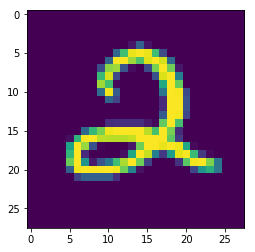

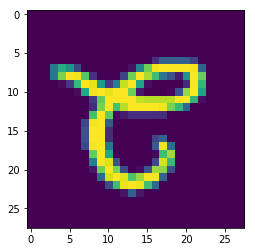

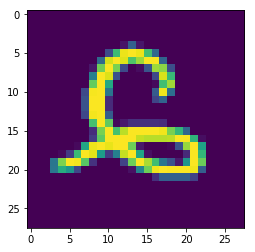

(None, None, None)

In [28]:
showDigitImage(x_train[0]),showDigitImage(rotate180(x_train[0])),showDigitImage(vertical_flip(x_train[0]))

# No noise: 1 vs All

In [29]:
pca = PCA(n_components=20)
pca.fit(x_train)

x_train_pca = pca.transform(x_train)

x_projected = pca.inverse_transform(x_train_pca)

x_test_pca = pca.transform(x_test)

x_test_projected = x_test_pca.dot(pca.components_) + pca.mean_



In [30]:
# Train from original

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(x_train, new_y_train)
right = np.sum(logisticRegr.predict(x_test)==new_y_test)
print(right,"/",len(y_test),"=",right/len(y_test),"%")



7860 / 8000 = 0.9825 %


In [31]:
# Train from PCA

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(x_train_pca, new_y_train)
right = np.sum(logisticRegr.predict(pca.transform(x_test))==new_y_test)
print(right,"/",len(y_test),"=",right/len(y_test),"%")



7808 / 8000 = 0.976 %


In [32]:
# ans = logisticRegr.predict(pca.transform(x_test))
# rs = ans!=new_y_test
# print(y_test[rs][:5],ans[rs][:5])
# for mistake in x_test[rs][:5]:
#     showDigitImage(mistake)

In [33]:
# Train from PCA_inverse

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(x_projected, new_y_train)
right = np.sum(logisticRegr.predict(x_test_projected)==new_y_test)
print(right,"/",len(y_test),"=",right/len(y_test),"%")


7808 / 8000 = 0.976 %


In [34]:
# ans = logisticRegr.predict(x_test_projected)
# rs = ans!=new_y_test
# print(y_test[rs][:5],ans[rs][:5])
# for mistake in x_test_projected[rs][:5]:
#     showDigitImage(mistake)

# Noise: 1 vs All

In [35]:
def add_true_noise_to_train_set(x_train,p):
    rs = []
    thresholds = np.random.rand(len(x_train)) < p
    for i in range(len(x_train)):
        if(thresholds[i]):
#             print(i)
            if(np.random.rand()<0.5):
                
                rs += [vertical_flip(x_train[i].copy())]
            else:
                rs += [rotate180(x_train[i].copy())]
        else:
            rs += [x_train[i].copy()]
    return rs


In [36]:
true_noise_x_train = add_true_noise_to_train_set(x_train,0.8)


In [37]:
pca = PCA(n_components=20)
pca.fit(true_noise_x_train)

x_train_pca = pca.transform(true_noise_x_train)

x_projected = pca.inverse_transform(x_train_pca)

x_test_pca = pca.transform(x_test)

x_test_projected = x_test_pca.dot(pca.components_) + pca.mean_



In [38]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(true_noise_x_train, new_y_train)
right = np.sum(logisticRegr.predict(x_test)==new_y_test)
print(right,"/",len(y_test),"=",right/len(y_test),"%")

7279 / 8000 = 0.909875 %


In [39]:
# ans = logisticRegr.predict(x_test)
# rs = ans!=new_y_test
# print(y_test[rs][:5],ans[rs][:5])
# for mistake in x_test[rs][:5]:
#     showDigitImage(mistake)

In [40]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(x_train_pca, new_y_train)
right = np.sum(logisticRegr.predict(pca.transform(x_test))==new_y_test)
print(right,"/",len(y_test),"=",right/len(y_test),"%")

6946 / 8000 = 0.86825 %


In [41]:
# ans = logisticRegr.predict(pca.transform(x_test))
# rs = ans!=new_y_test
# print(y_test[rs][:5],ans[rs][:5])
# for mistake in x_test[rs][:5]:
#     showDigitImage(mistake)

In [42]:
# Train from PCA_inverse

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(x_projected, new_y_train)
right = np.sum(logisticRegr.predict(x_test_projected)==new_y_test)
print(right,"/",len(y_test),"=",right/len(y_test),"%")


6946 / 8000 = 0.86825 %


In [43]:
# ans = logisticRegr.predict(x_test_projected)
# rs = ans!=new_y_test
# print(y_test[rs][:5],ans[rs][:5])
# for mistake in x_test_projected[rs][:5]:
#     showDigitImage(mistake)

# Noise: All vs All

In [44]:
# Train with original data
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(true_noise_x_train, y_train)
right = np.sum(logisticRegr.predict(x_test)==y_test)
print(right,"/",len(y_test),"=",right/len(y_test),"%")

5881 / 8000 = 0.735125 %


In [45]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(x_train_pca, y_train)
right = np.sum(logisticRegr.predict(pca.transform(x_test))==y_test)
print(right,"/",len(y_test),"=",right/len(y_test),"%")

4903 / 8000 = 0.612875 %


In [46]:
# Train from PCA_inverse

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(x_projected, y_train)
right = np.sum(logisticRegr.predict(x_test_projected)==y_test)
print(right,"/",len(y_test),"=",right/len(y_test),"%")


4904 / 8000 = 0.613 %


In [1]:
def add3(x):
    return x+3

def addxys(x,y,f):
    return f(x)+y

6

In [8]:
import numpy as np
img28 = np.eye(28)
# from skimage.transform import resize
# img29r = resize(img, (29, 29))
# from scipy.misc import imresize
# img29i = imresize(img, (29, 29))


(28, 28)

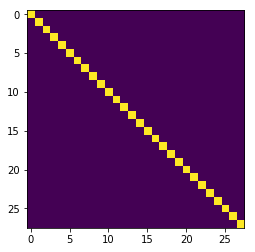

In [14]:
t = img28.reshape(28,28)
plt.imshow(t)
plt.show()

In [16]:
import scipy.misc

i_width = 640
i_height = 480

nt = scipy.misc.imresize(t, (i_height, i_width))
plt.imshow(nt)
plt.show()

AttributeError: module 'scipy.misc' has no attribute 'imresize'

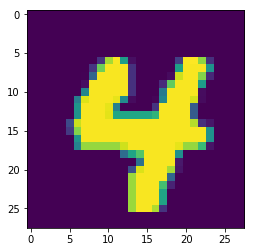

In [2]:
t = x_train[4123].reshape(28,28)
plt.imshow(t)
plt.show()

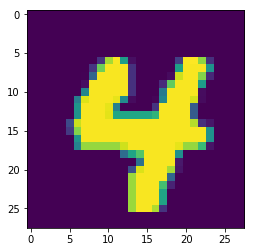

In [3]:
# from scipy.ndimage.interpolation import zoom

# nt = zoom(t, 0.1)
# plt.imshow(nt)
# plt.show()
import cv2
import numpy as np

plt.imshow(t)
# res = cv2.resize(t, dsize=(20, 5))
# plt.imshow(res)

# back = res.copy()
# back.resize(28,28)
# plt.imshow(back)

In [14]:
def scale_down(xs,new_shape):
    res = cv2.resize(t, dsize=new_shape)
    rs = np.zeros((28,28))
    for i in range(new_shape[1]):
        print(len(res),new_shape[1])
        for j in range(new_shape[0]):
            
            rs[i+10][j+10] = res[i][j]
    
    return rs

8 8
8 8
8 8
8 8
8 8
8 8
8 8
8 8


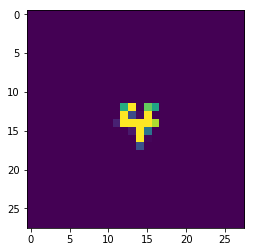

In [15]:
nt = scale_down(t,(8,8))
plt.imshow(nt)

In [6]:
cv2.resize(t,(10,5)).shape

(5, 10)